<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import decomposition

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_validate, cross_val_score

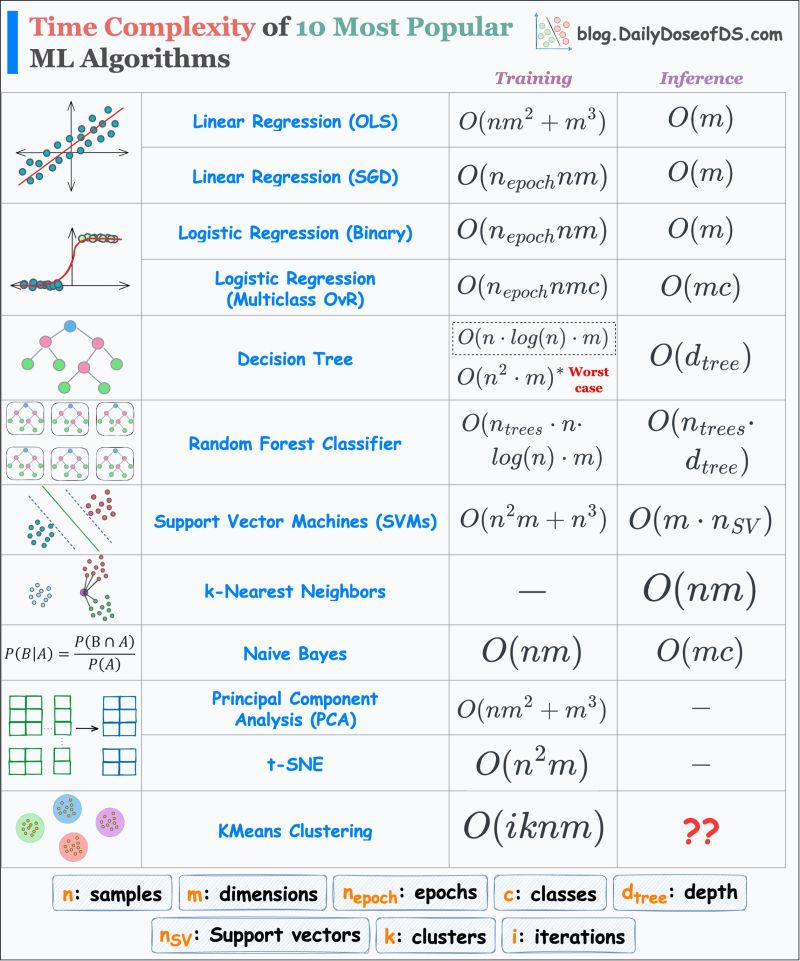

# **Linear Regression (OLS)**

## Python Scratch Implementation


In [ ]:
import numpy as np
class LinearRegression() :
      def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
def predict(self, X):
      return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
def r2_score(self, X, y):
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape
    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-clean.csv
100%|██████████████████████████████████████| 7.10M/7.10M [00:00<00:00, 10.8MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train)

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942227

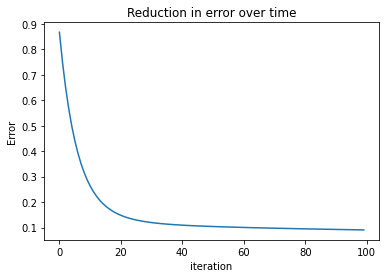

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9114445609103706


## Using Scikit learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-cleaned.csv
100%|██████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 3.56MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [ ]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

Univariate

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.9967642])

In [ ]:
model.intercept_

0.0015237505846125154

In [ ]:
y_hat = model.predict(X1)

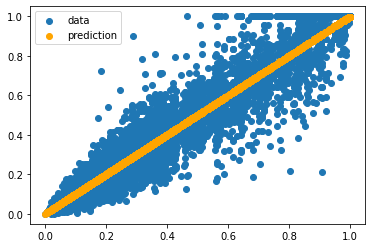

In [ ]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Multivariate

In [ ]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

In [ ]:
model.intercept_

-724834810251.1912

No handles with labels found to put in legend.


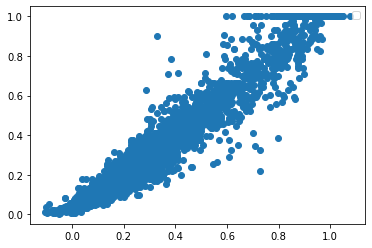

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)

plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train)

0.9459006122528419

In [ ]:
model.score(X_test, y_test)

0.9459859520373978

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

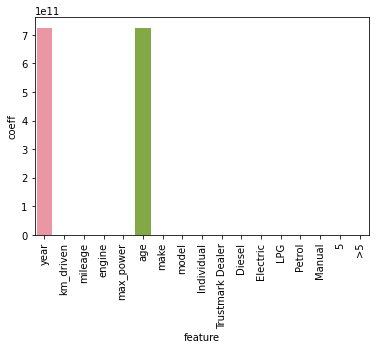

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))] # Most Important

'year'

In [ ]:
X_test.columns[np.argmin(np.abs(model.coef_))] # Least Important

'Manual'

## Using Statsmodel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 24.1MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3443,-0.488480,0.170967,-0.908259,0.041071,0.406096,0.488480,-0.177218,-0.432940,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,-2.016868,0.444503,-0.424728
16090,0.762867,-0.447817,0.234219,-0.921213,-0.694426,-0.762867,-0.433854,-0.548397,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
11070,0.450030,1.389198,0.483191,-0.439107,-0.210518,-0.450030,-0.639625,-0.453932,1.248892,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,-2.016868,0.444503,-0.424728
19214,1.075704,-0.287977,-0.312588,-0.539385,-0.252966,-1.075704,-0.246579,-0.275499,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
17843,-1.114153,-0.196436,-0.768649,0.033357,0.265347,1.114153,-0.327501,-0.695343,1.248892,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.388540,-0.559005,-1.355012,1.768939,1.109840,-1.388540,0.724475,2.432495,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
18898,1.075704,-0.764944,0.580918,-0.537456,-0.364671,-1.075704,-0.433854,-0.432940,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
11798,0.450030,-0.302209,-0.980391,0.222343,0.517801,-0.450030,-0.327501,0.391004,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
6637,-0.488480,-0.834557,-0.145056,1.001426,1.918587,0.488480,3.360773,2.820851,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,-2.016868,0.444503,-0.424728


In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:06:21   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

In [ ]:
results.predict(X_sm)

3443    -0.354511
16090   -0.476414
11070   -0.359932
19214   -0.121763
17843   -0.656579
           ...   
1099     2.335550
18898   -0.334020
11798    0.398398
6637     2.564373
2575    -0.076645
Length: 15856, dtype: float64

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:43:15   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

## **Linear Regression Assumptions**

* Below link contains Hypothesis Tests to quantify the linear Regression Assumptions
https://www.statsmodels.org/0.6.1/examples/notebooks/generated/regression_diagnostics.html

### Multicollinearity and Variance Inflation Factor[VIF]

#### Undersanding

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
# X_t.values enters all the values with out column & row index
# i refer to feature index which is to be considered as dependent to find its VIF
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Removing the features with very high VIF values

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

In [ ]:
print(vif)
print(sm_model.summary())

#### Code for High Multicollinear Features Deletion

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
df = pd.read_csv('cars24-car-price-clean.csv')

#Initial Assessment of the Data
y=df['selling_price']
X=df.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

print()
print("*******************************************************************************************************************************")
print()

# Iterative code for auto removing High VIF features with keeping VIF & R2 Threshold values
vif_thr = 5
r2_thr = 0.80
j = 1
feats_removed = []
cols2 = X_train.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())


Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 107MB/s]
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:01:09   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Reached threshold
Highest vif: Features    max_power
VIF              2.71
Name: 0, dtype: object
Current adj.R2 0.7978180731672628
Features removed: 5
List of features removed: ['year', 'Petrol', '>5', 'engine', 'model']

*******************************************************************************************************************************

            Features   VIF
0          max_power  2.71
1               make  2.33
2            mileage  2.24
4             Manual  1.66
5             Diesel  1.53
6                  5  1.45
3                age  1.31
7          km_driven  1.20
8           Electric  1.17
9         Individual  1.08
10  Trustmark Dealer  1.02
11               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:        

### Normality of Residuals

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

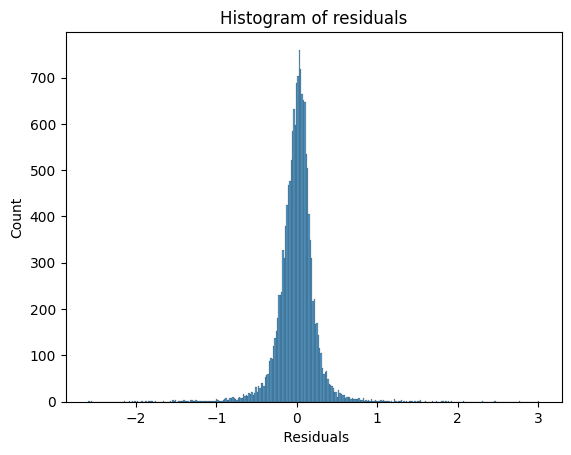

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

### Mean of Residuals

In [ ]:
np.mean(yhattrain-ytrain)

-4.929390229335695e-16

In [ ]:
np.mean(yhattest-ytest)

0.006100917484111618

* Mean of Residuals are almost equivalent to Zero

### Linearity of variables

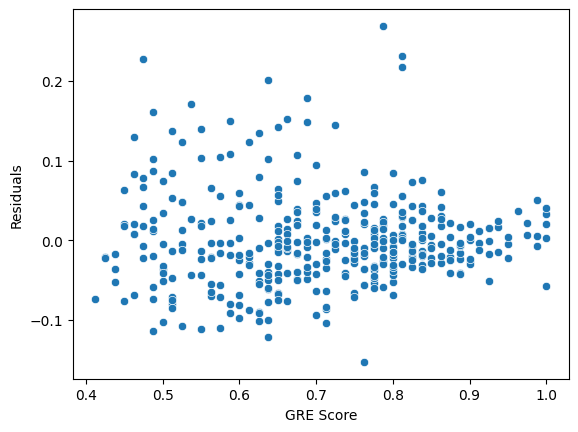

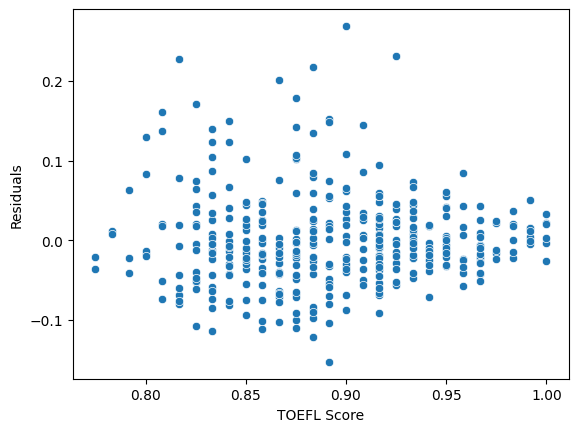

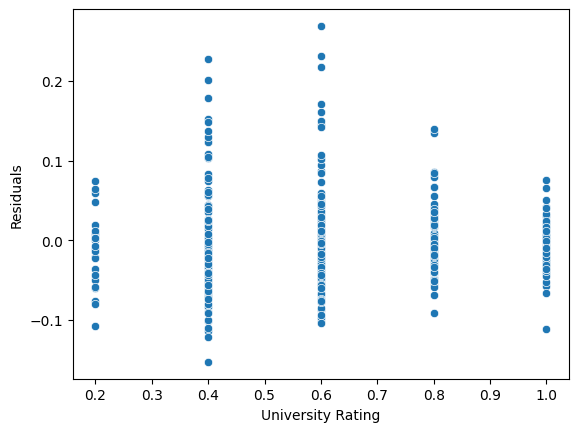

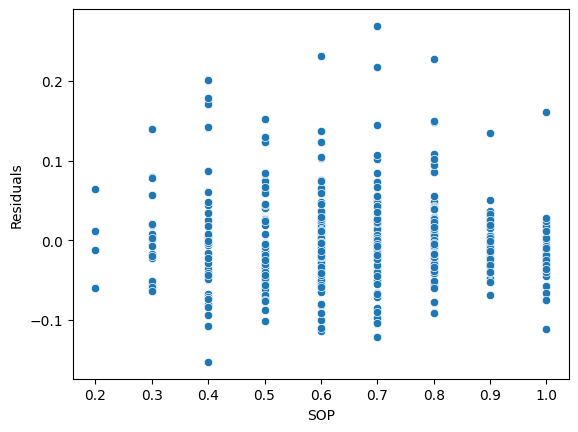

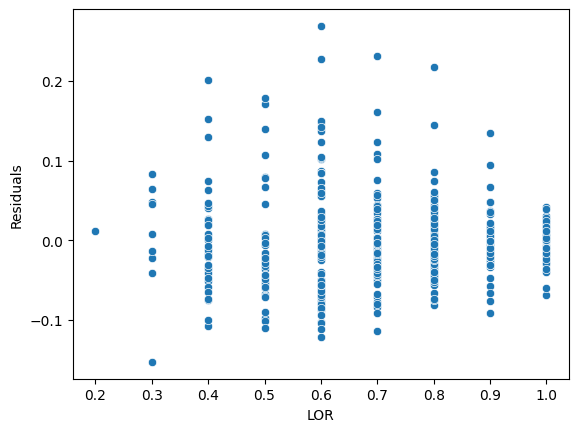

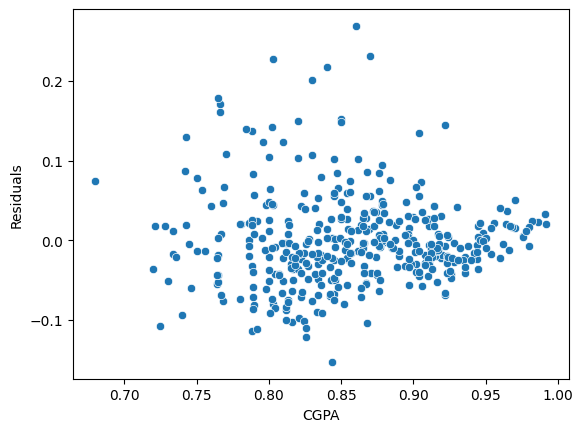

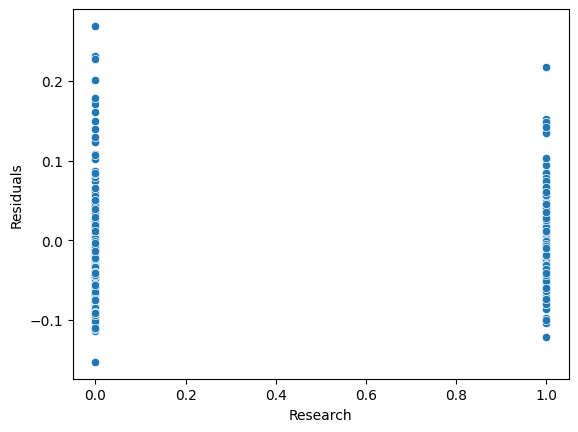

In [ ]:
for i in Xtrain.columns:
  sns.scatterplot(x=Xtrain[i],y=(yhattrain-ytrain))
  plt.xlabel(i)
  plt.ylabel("Residuals")
  plt.show()

* We can say No Rigid pattern observed for Residual w.r.t Features

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic
## Closer the value to 1, more is the normality.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526061177253723

### No Heteroskedasticity

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

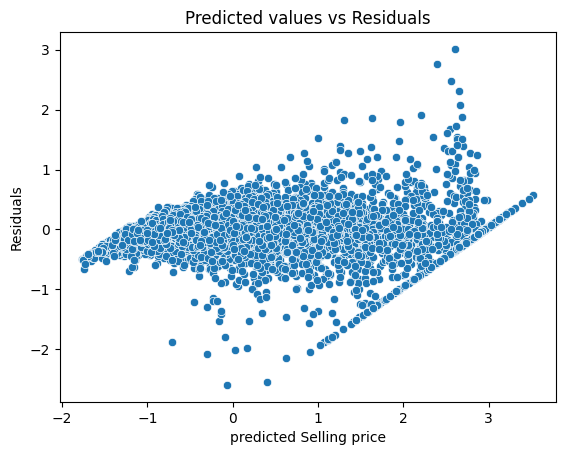

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

#### Hypothesis Test for Hetero Skedasticity

In [ ]:
# Ho : Residuals are homoscedastic, No Heteroskedasticity
# Ha : Residual are Heteroskedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

## **Regularization**

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
data = datasets.load_diabetes()

In [ ]:
data

In [ ]:
X = data['data']

y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features
degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)




LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
output = model.predict(X_test_poly_scaled)
print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 148108.35996367494
MSE for train: 2.0775197660902018e-23


### Lasso and Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [ ]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [ ]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 36918.32497911996
test MSE for L2: 115404.51869417798


### Ridge

L2 Regularization

* Hard Code using gradient Descent

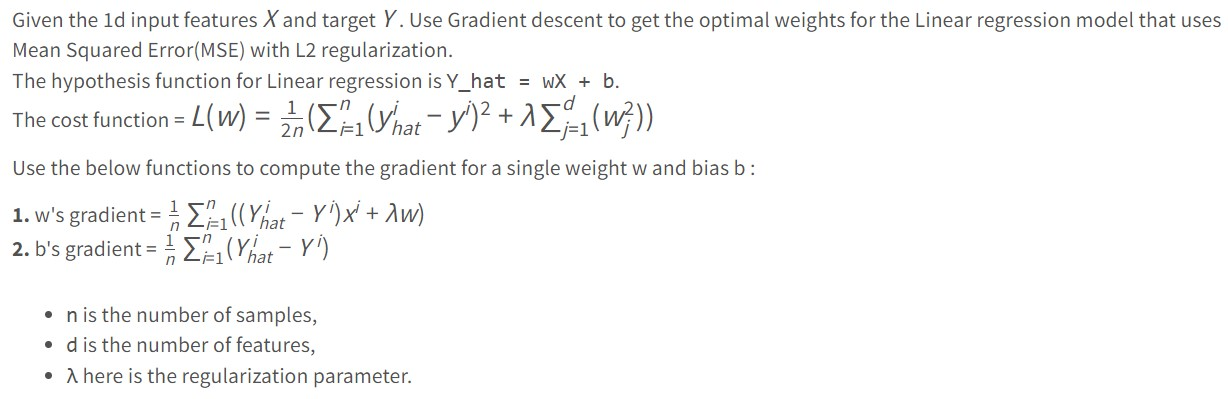

In [ ]:
def L2_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value * w)/ X.shape[0]
   b_deriv = np.sum(np.dot(w,X) - Y)/ X.shape[0]

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

* Code using scikit library

In [ ]:
model = Ridge(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

### Lasso

L1 Regularization

In [ ]:
def L1_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)
   w1 =

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value/2 * np.sign(w))/ X.shape[0])
   b_deriv = np.sum(np.dot(w,X) - Y)

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

In [ ]:
model = Lasso(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

In [ ]:
import numpy
numpy.sign([1,-3,-45,-65869,0])

array([ 1, -1, -1, -1,  0])

### ElasticNet

Both L1 & L2 Normalization used together with user inputted l1ratio of regularization constant

* l1_ratio = 0 --> Complete L2 Normalization
* l1_ratio = 1 --> Complete L1 Normalization

* 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [ ]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(Xtest)

## **Polynomial Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


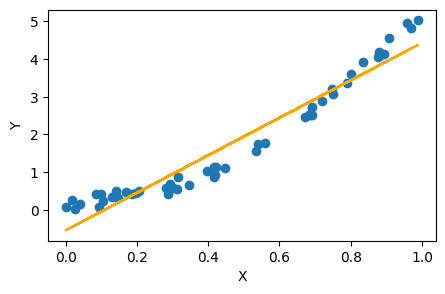

In [ ]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [ ]:
def adj_r(r_sq,X):
  adj_r1 = (1 - ((1-r_sq)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

R-square: 0.9948973526246709
Adj. R-square: 0.9947910474710182


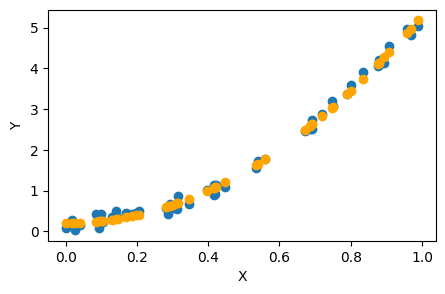

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print("R-square:",model_deg2.score(X_deg2, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


R-square: 0.994924691754525
Adj. R-square: 0.9948189561660776


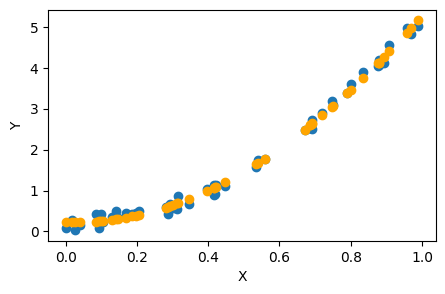

In [ ]:
#adding new feature X^3
X_deg3 = np.hstack([X, X**2,X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

print("R-square:",model_deg3.score(X_deg3, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

* Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

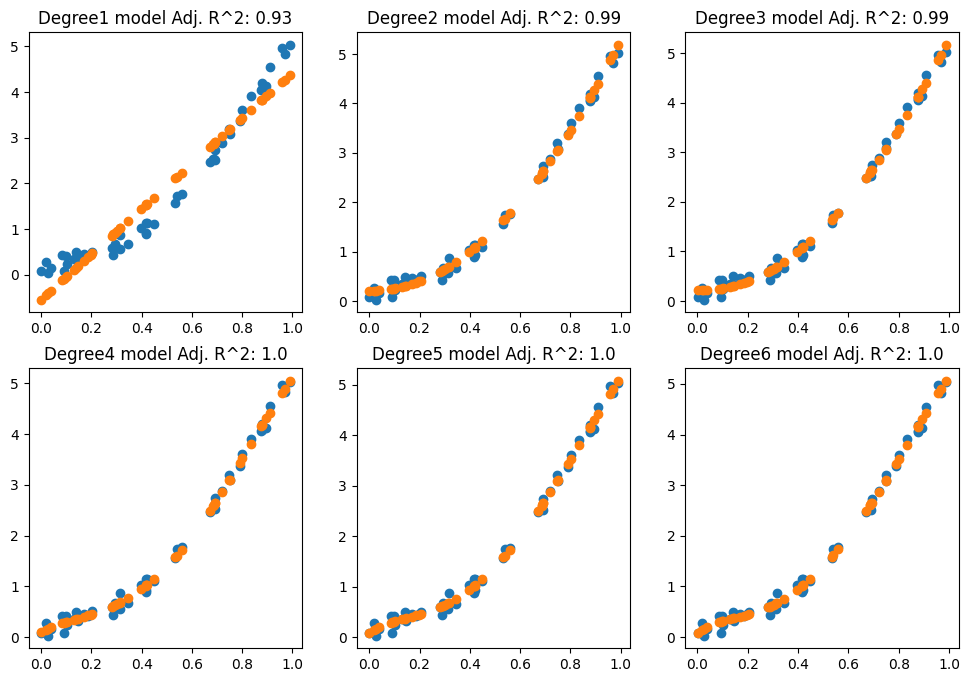

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

## **Hyperparameters**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
# sklearn.pipeline.make_pipeline(*steps, memory=None, verbose=False)
# *steps --> list of Estimator objects
List of the scikit-learn estimators that are chained together.
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(10), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

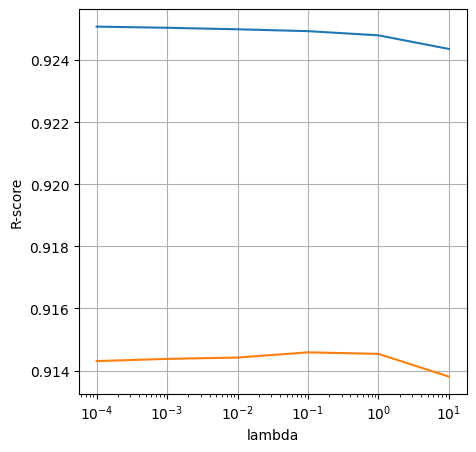

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

Best lambda: 0.1


## **Cross Validation**

### Normal

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

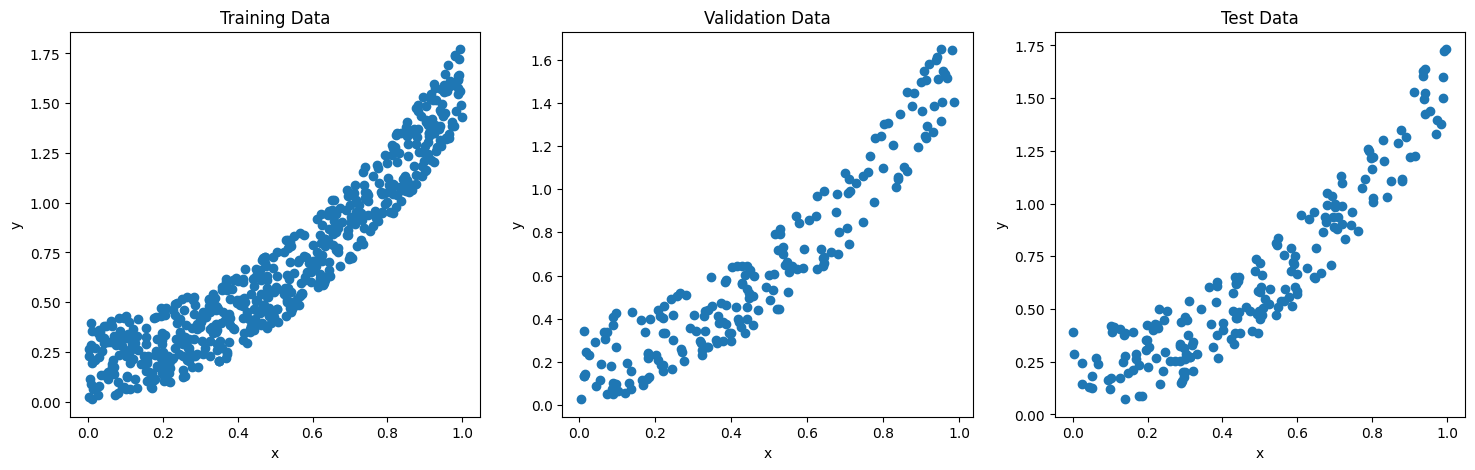

In [ ]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

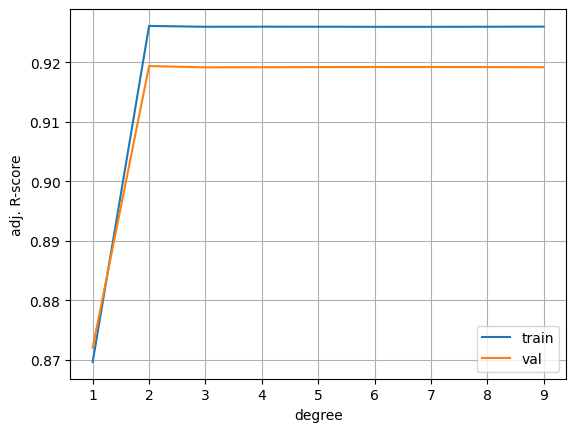

In [ ]:
# Same as we did earlier and in the last lecture
max_degree = 10 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
    polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

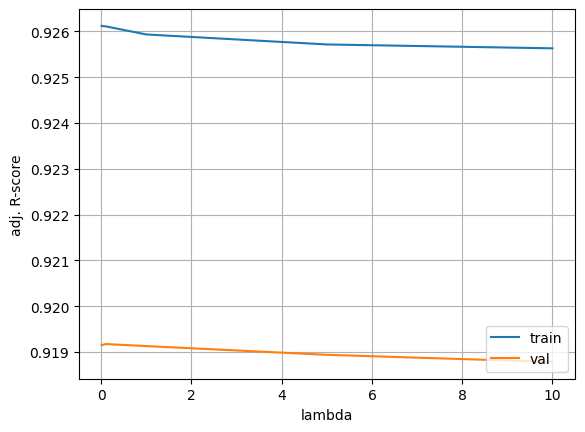

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [ ]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

### K-Fold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 10 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

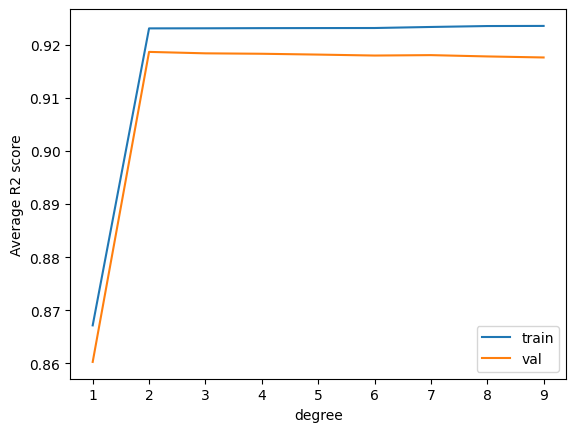

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

## **Linear Regression Metrics**

### Model Results

In [ ]:
# Calculating the Predicted Values (yhat) of training data
yhattrain = results.predict(Xtrain1)

In [ ]:
# Calculating the Predicted Values (yhat) of testing data
Xtest1 = sm.add_constant(Xtest)
yhattest = results.predict(Xtest1)

In [ ]:
results.params.sort_values(ascending = False)

CGPA                 0.561533
GRE Score            0.169155
TOEFL Score          0.131429
LOR                  0.103283
Research             0.039244
University Rating    0.030733
const                0.022418
SOP                  0.013592
dtype: float64

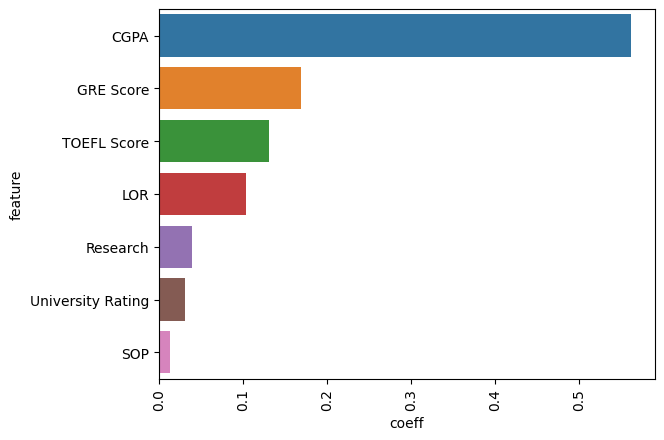

In [ ]:
weights = pd.DataFrame(list(zip(Xtest.columns,np.abs(results.params[1:]))),
                   columns=['feature', 'coeff'])
weights.sort_values(by = "coeff", ascending = False, inplace = True)
sns.barplot(y='feature', x='coeff', data=weights)
plt.xticks(rotation=90)
plt.show()

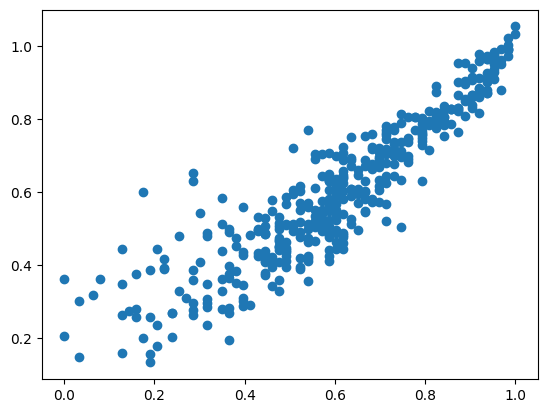

In [ ]:
plt.scatter(ytrain, yhattrain)

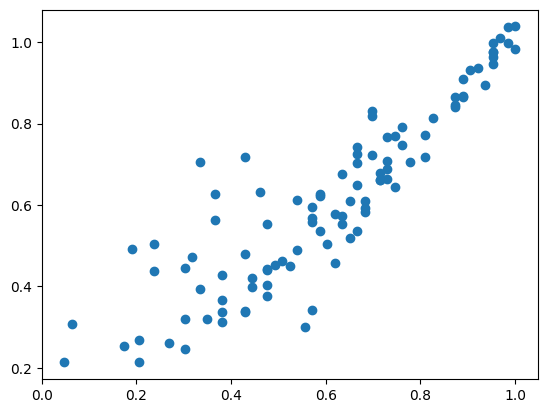

In [ ]:
plt.scatter(ytest, yhattest)

* from Yhat and yactual plot we can say , model is predicting good

* Now lets check R-square of Testing & Training data

### R-Square

In [ ]:
# R-square Using OLS Attribute for Training data
results.rsquared

0.8292848575410212

In [ ]:
# R-square for training data
1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)

0.8292848575410212

In [ ]:
# R-square for testing data
1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)

0.7927364356781469

* **From R-square Values of Test & Train Data, we can say model is neither Overfit nor Underfit**
* **It is appropriately Fit**

### R-Square Adjusted

In [ ]:
# used defined function for R-Square Adjusted
def R2adj(X,R2):
  return (1 - (1-R2) * ((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

In [ ]:
R2adj(Xtrain,results.rsquared)

0.8262363728542538

In [ ]:
# R-square adjusted Using OLS Attribute for Training data
results.rsquared_adj

0.8262363728542538

In [ ]:
# R-square adjusted for training data
R2= 1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)
1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))

0.8262363728542538

In [ ]:
# R-square adjusted for testing data
R2= 1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)
1 - (1-R2) * ((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

0.7769663818710494

* **From Comparison of R-Square and R-Square Adjusted, we see difference b/w R-Square & R-Square adj for Training [0.829 - 0.826 = 0.003] , for testing [ 0.792 - 0.776 = 0.016] is very small**
* **So we can conclude there are no irrelevant features inline with our earlier Hypothesis Testing**

### Mean Absolute Error

In [ ]:
# MAE for Training data
(np.sum(np.abs(ytrain-yhattrain)))/len(ytrain)

0.06568270842637872

In [ ]:
# MAE for testing data
(np.sum(np.abs(ytest-yhattest)))/len(ytest)

0.07509931877554368

* Both Test & Train data MAE Values are very low meaning our model is performing good

### Root Mean Square Error

In [ ]:
# RMSE for Training data
((np.sum((ytrain-yhattrain)**2))**0.5)/len(ytrain)

0.004579977329232789

In [ ]:
# RMSE for testing data
((np.sum((ytest-yhattest)**2))**0.5)/len(ytest)

0.010564357955452694

* Both Test & Train data RMSE Values are very low meaning our model is performing good

# **Logistic Regression**

* Classification = Logistic Regression
* We use Sigmoid function to Convert (-inf,inf)(perpendiuclar distance from classifier) -->(0,1)(propability of it lying in classifier Normal direction (+ve side ))

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 125MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)

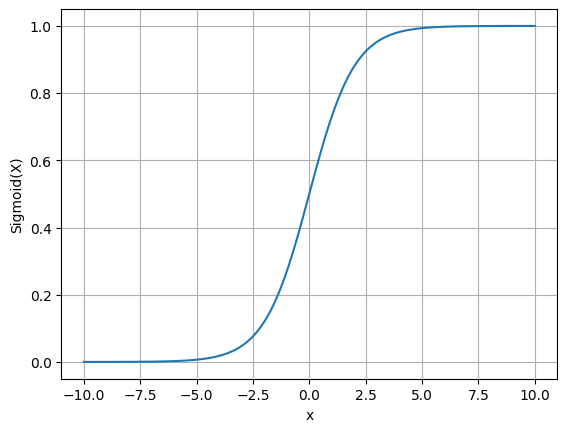

In [ ]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [ ]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

0.01005033585350145

In [ ]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

0.6931471805599453

In [ ]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

2.3025850929940455

In [ ]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 103MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [ ]:
model.intercept_

array([-0.01215015])

In [ ]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
# Accuracy for training data
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [ ]:
# Accuracy for validation data
accuracy(y_val, model.predict(X_val))

## Binomial

In [ ]:
model = LogisticRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(Xtest)

## One Versus all

* It is a logistic regression algorithm that is used when the target variable has two or more classes. It trains one logistic regression model for each class, with that class as the positive class and all other classes as the negative class. It predicts the probability of each class and selects the class with the highest probability as the predicted class.

In [ ]:
model = LogisticRegression(multi_class = "ovr",solver='liblinear')
model.fit(Xtrain,ytrain)
model.predict(Xtest)

## Multinomial

* It is a logistic regression algorithm that is used when the target variable has more than two classes. It predicts the probability of each class and selects the class with the highest probability as the predicted class

In [ ]:
model = LogisticRegression(multi_class ='multinomial',solver='lbfgs')
model.fit(Xtrain,ytrain)
model.predict(Xtest)

## Hyperparameter tuning


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda (Regularization Constant)
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

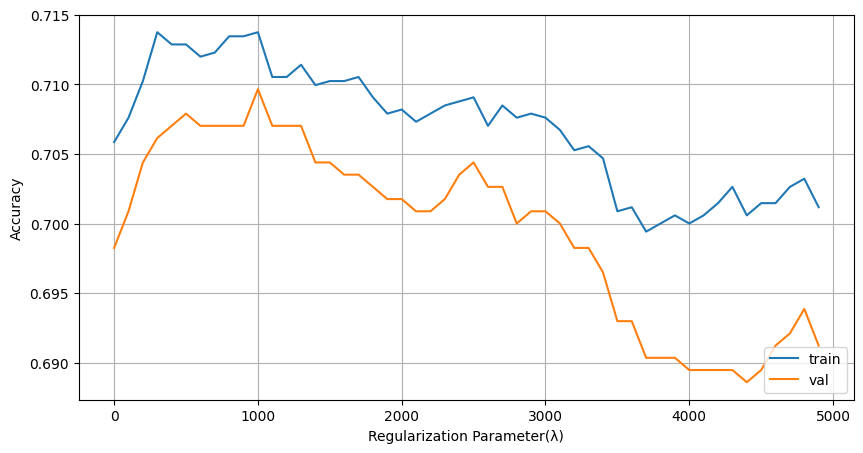

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [ ]:
accuracy(y_train, model.predict(X_train))

0.7137426900584796

In [ ]:
accuracy(y_val, model.predict(X_val))

0.7096491228070175

In [ ]:
accuracy(y_test, model.predict(X_test))

0.7096491228070175

## Multi Class Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


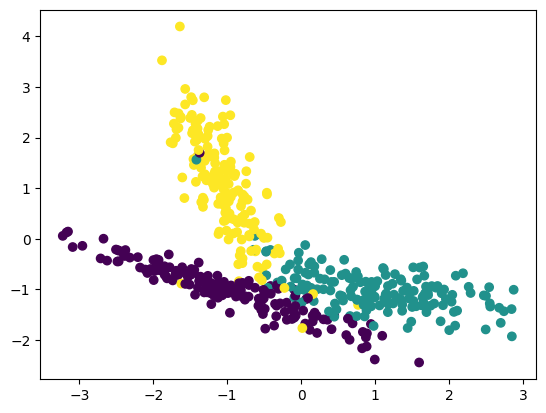

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [ ]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [ ]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


<ipython-input-82-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


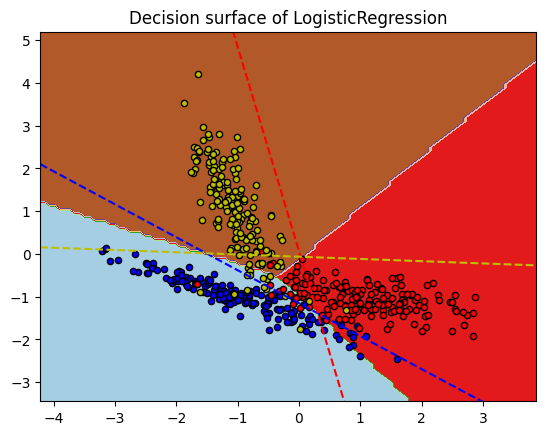

In [ ]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

## Classification Metrics


https://medium.com/nerd-for-tech/performance-metrics-for-classification-models-b5602c21315b

 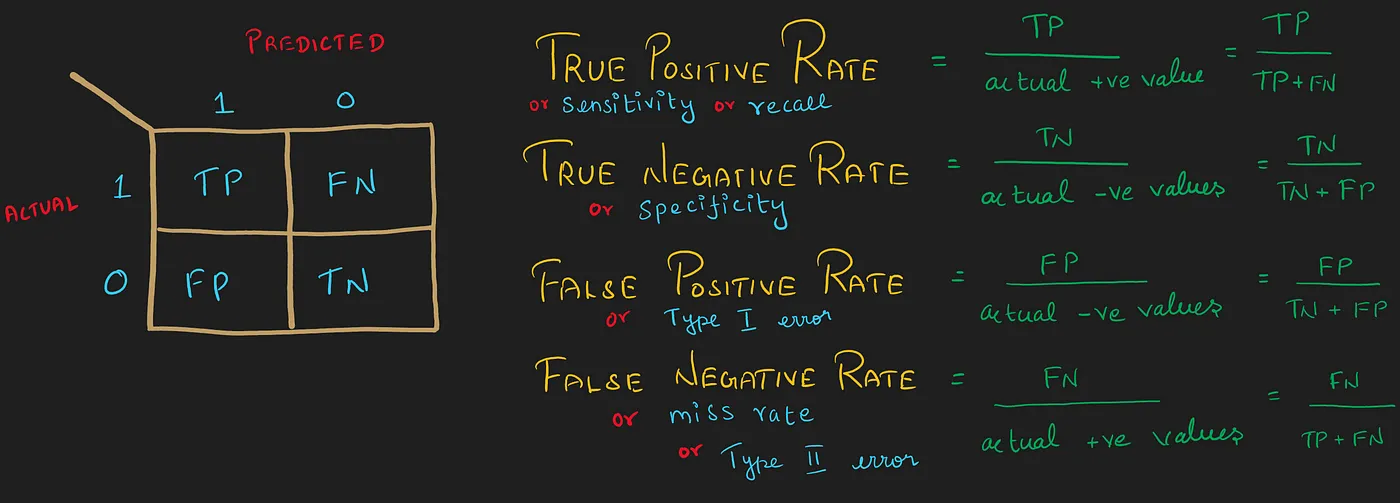

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 112MB/s]


In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 133MB/s]


In [ ]:
dt = pd.read_csv('Spam_finalData.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

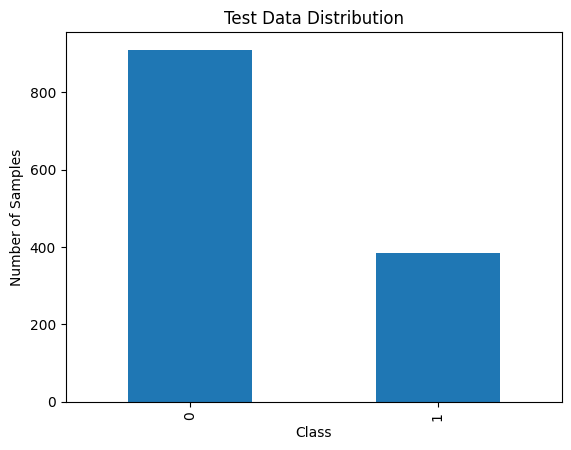

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9396751740139211


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[860,  49],
       [ 29, 355]])

In [ ]:
from matplotlib import pyplot as plt

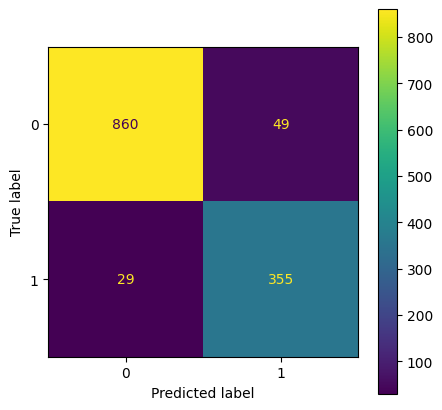

In [ ]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Finding Accuracy using Confusion Matrix

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9396751740139211

In [ ]:
def precision_calc(conf):
    tp = conf[1,1]
    fp = conf[0,1]

    return tp/(tp+fp)

In [ ]:
precision_calc(conf_matrix)

0.8787128712871287

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8787128712871287

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
def recall_calc(conf):
    tp = conf[1,1]
    fn = conf[1,0]

    return tp/(tp+fn)

In [ ]:
recall_calc(conf_matrix)

0.9244791666666666

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9244791666666666

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.8787123712874133


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.9010152284263959


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
probability = model.predict_proba(X_test)

In [ ]:
probability

array([[0.41780926, 0.58219074],
       [0.76850792, 0.23149208],
       [0.4283516 , 0.5716484 ],
       ...,
       [0.86554959, 0.13445041],
       [0.9453275 , 0.0546725 ],
       [0.87505127, 0.12494873]])

In [ ]:
probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

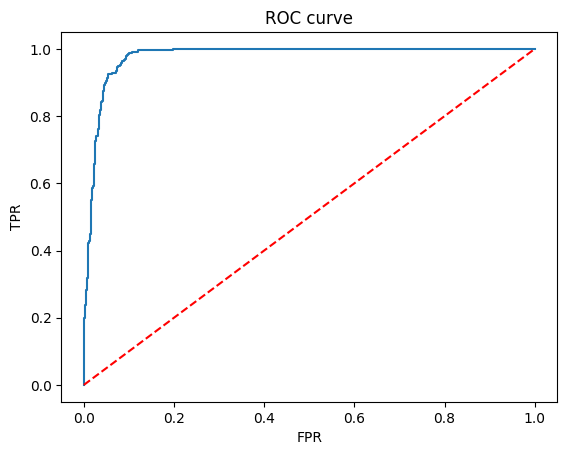

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.9779319077741108

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

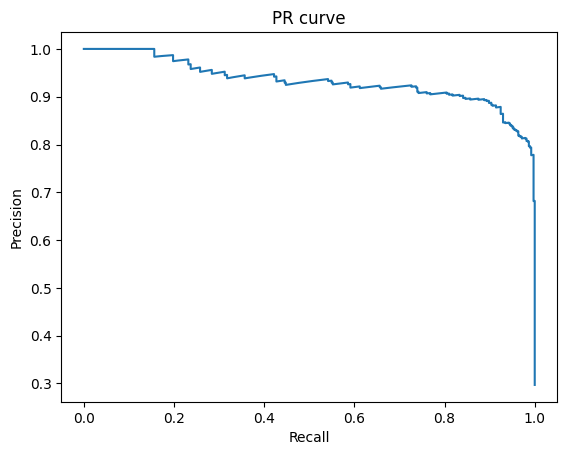

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9329519420016692

### F-Beta Score

* A default beta value is 1.0, which is the same as the F-measure.
* A smaller beta value, such as 0.5, gives more weight to precision and less to recall [when FP has more impact than FN ]
* whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score [ When FN has more impct than FP]

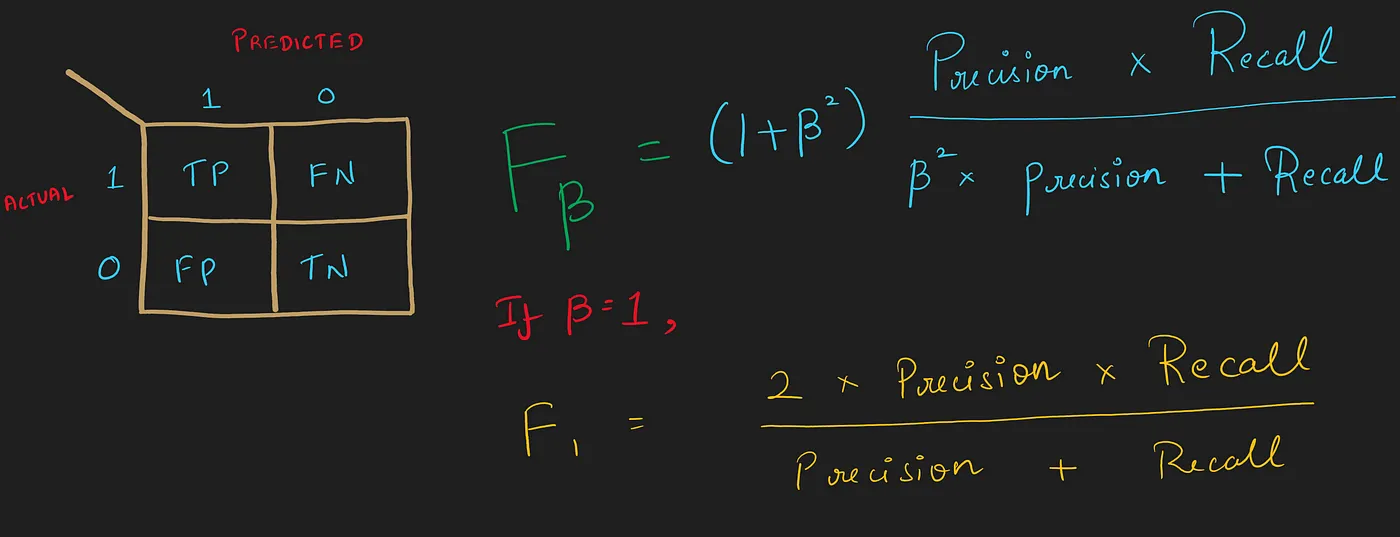

In [ ]:
# (1 + beta**2)(Precision * Recall)/( (beta**2 * Precision) + Recall )
from sklearn.metrics import fbeta_score
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [1,1,1,1,1,1,1,1,1,1]
f= fbeta_score(y_true, y_pred, beta = 0.5)
print('F=', f)

F= 0.5555555555555556


## Class Imbalance

https://imbalanced-learn.org/stable/introduction.html

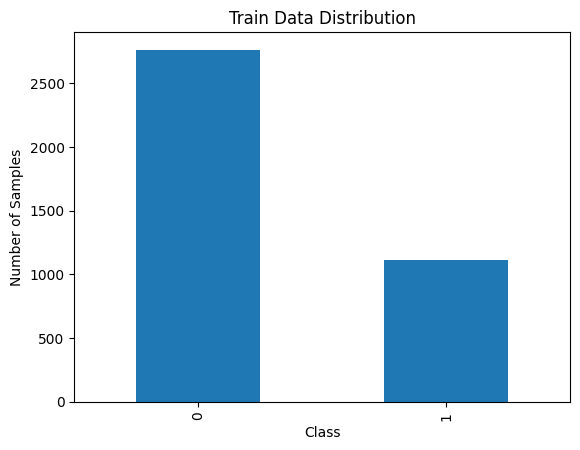

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [ ]:
y_train.value_counts()

0    2763
1    1115
Name: label_num, dtype: int64

In [ ]:
2763/1115

2.4780269058295965

In [ ]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score = f1_score(y_train, train_y_pred)
    test_score = f1_score(y_test, test_y_pred)

    return train_score,test_score


In [ ]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.47})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8376327769347496, Testing F1 score:0.8734321550741163


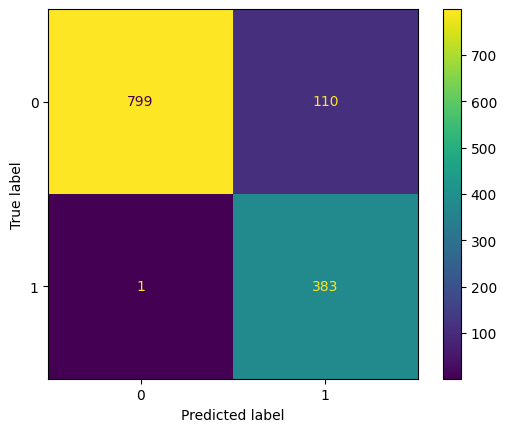

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9248183814833586, Testing F1 score:0.8724373576309796


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9491107589364325, Testing F1 score:0.925925925925926


# **Decision Trees**

In [ ]:
def calc_entropy(p_g,p_r):
    return -((p_g)*np.log2(p_g)+(p_r)*np.log2(p_r))

## DT-Classification

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 31.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 19.3MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:6 Accuracy Mean: Train: 90.51833384407234 Validation: 84.58783783783784
K-Fold for depth: 6 Accuracy Std: Train: 0.9528667083694777 Validation: 7.804013667897827
***************
K-Fold for depth:7 Accuracy Mean: Train: 93.24203753064435 Validation: 84.20945945945945
K-Fold for depth: 7 Accuracy Std: Train: 0.8887486809601636 Validation: 8.453236055736403
***************
K-Fold for depth:9 Accurac

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=6)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

In [ ]:
! pip install pydot

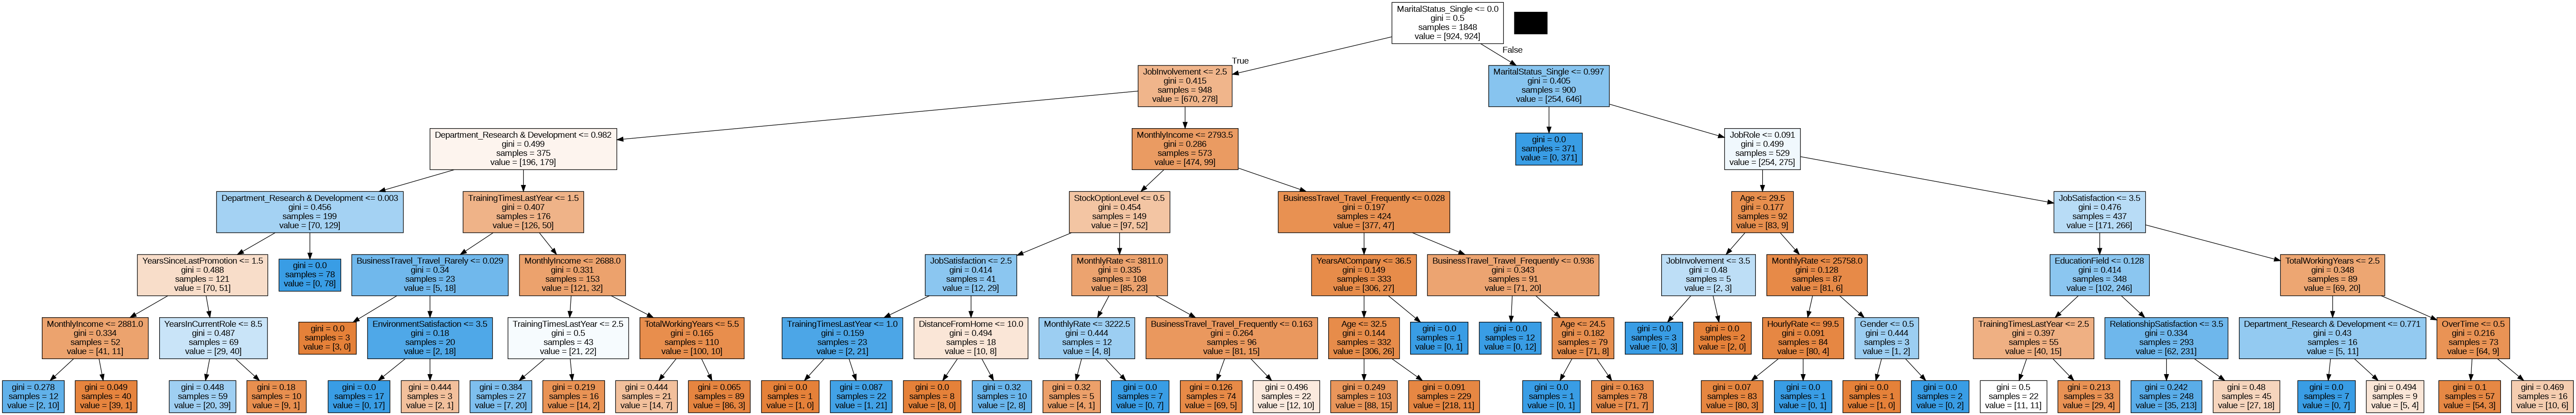

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Text(0.5, 23.52222222222222, 'Predicted label')

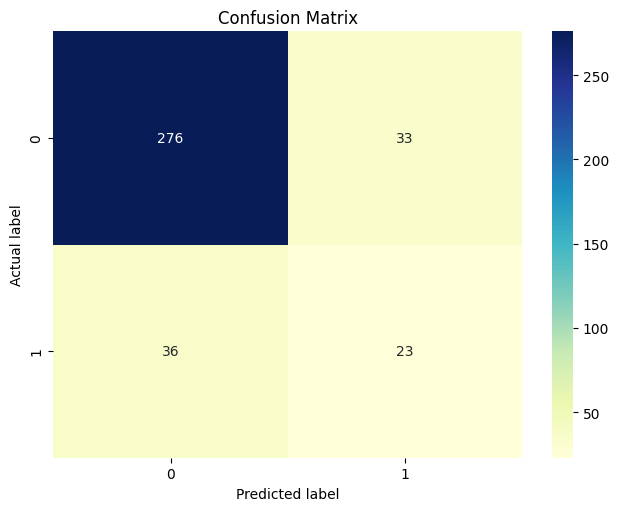

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Feature Importance

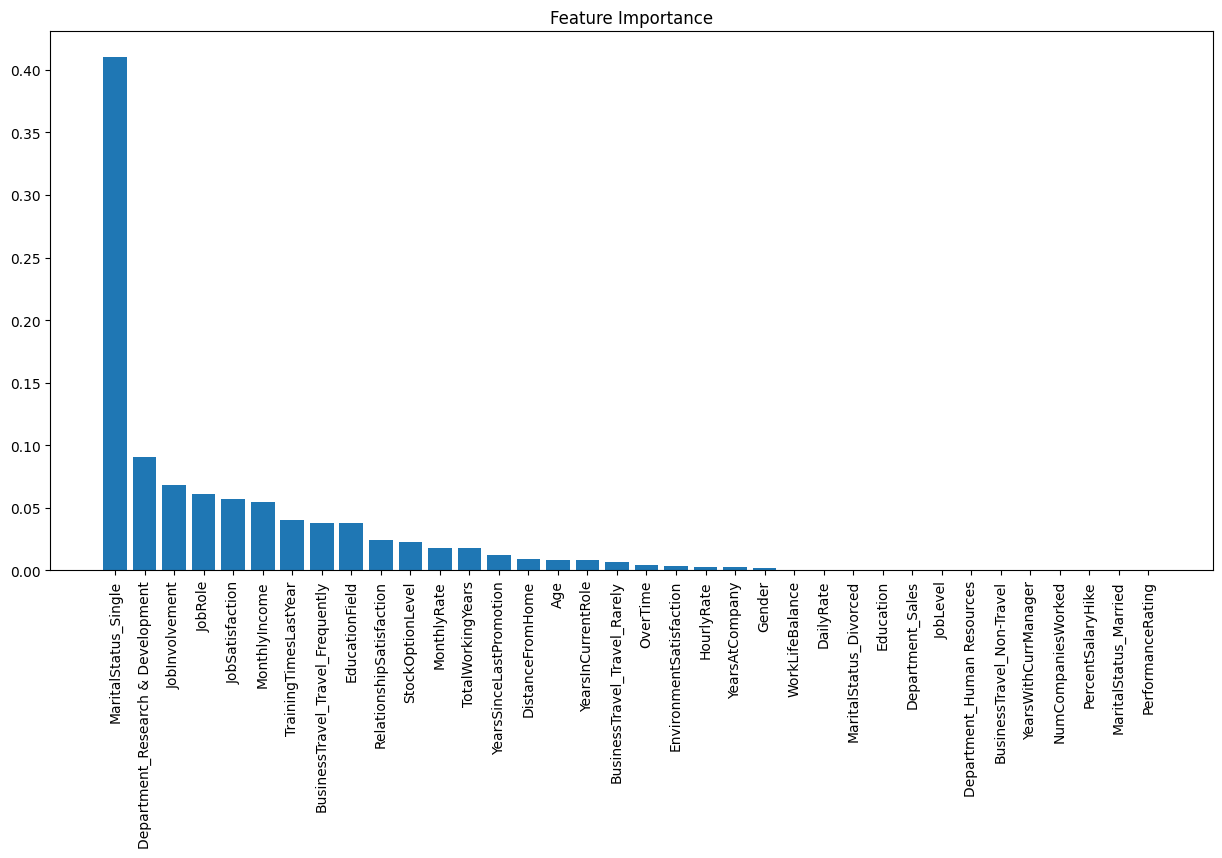

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.410260
1,Department_Research & Development,0.090586
2,JobInvolvement,0.068307
3,JobRole,0.060964
4,JobSatisfaction,0.057460
5,MonthlyIncome,0.054575
6,TrainingTimesLastYear,0.040416
7,BusinessTravel_Travel_Frequently,0.037893
8,EducationField,0.037847
9,RelationshipSatisfaction,0.024650


## DT-Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 34.6MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [ ]:
X = regression_data['X']
y = regression_data['Y']

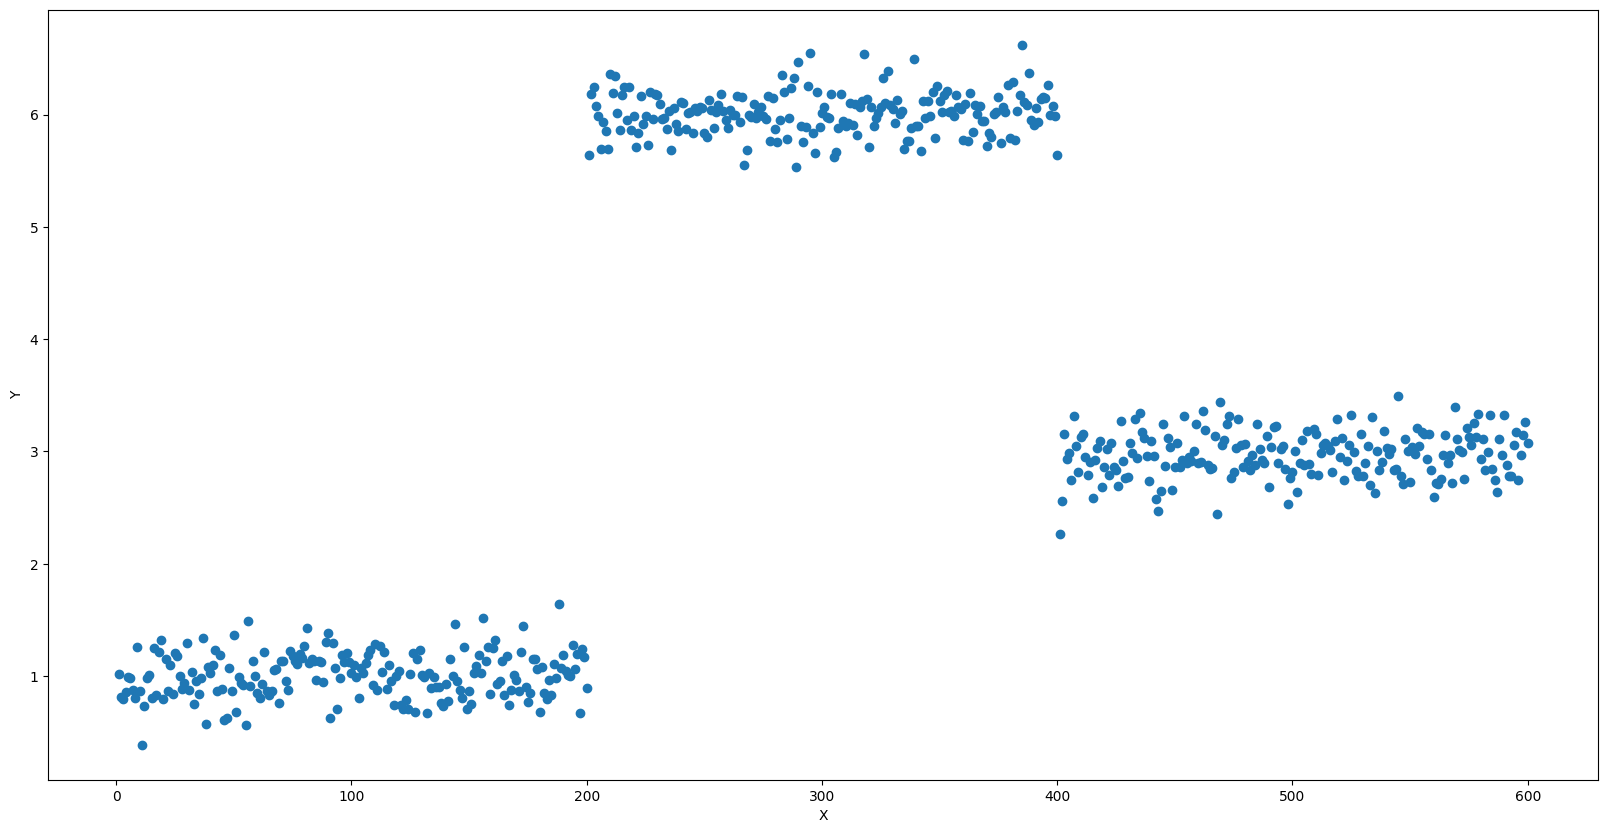

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

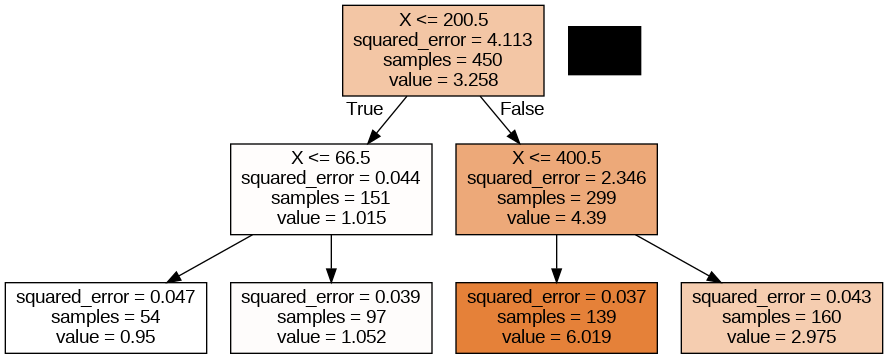

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

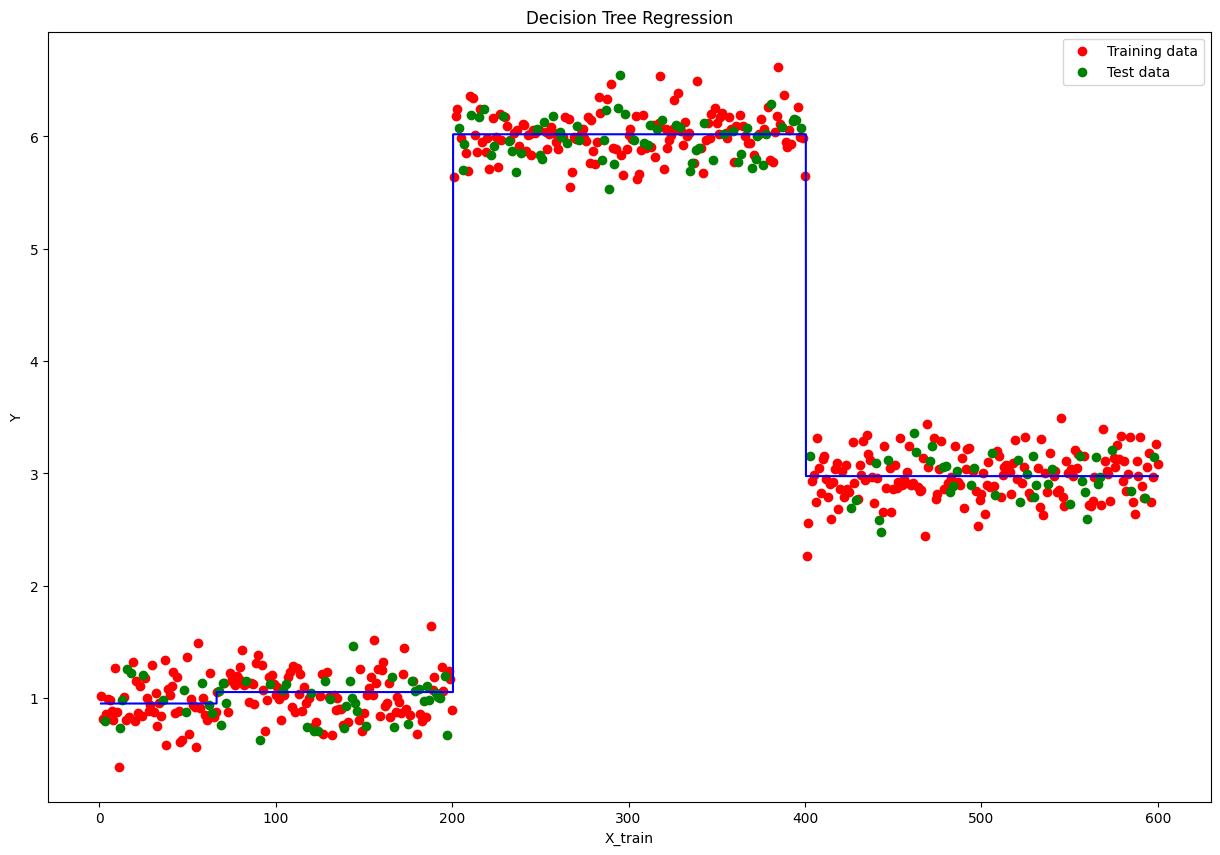

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()

# **Bagging**

## Bootstrapping and Finding sample mean

In [ ]:
import numpy as np
dataset = eval(input())
dataset = np.asarray(dataset)

#It returns the mean of numbers list
def mean(numbers):
	return sum(numbers) / float(len(numbers))

#printing the mean of the dataset
print('True Mean: %.3f' % mean(dataset))

#It returns a 2d list consisting of the observations from the dataset representing the subsamples used in bootstrap sampling
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = int(len(dataset)* ratio) #number of observations to draw from the dataset for the subsample according to dataset and ratio. It should be the rounded off integer.
    while len(sample) < n_sample:
      index = np.random.randint(0, len(dataset))  #pick a random index of observation from the dataset
      sample.append(dataset[index]) #append the observation to the list sample
    return sample

np.random.seed(1)

#ratio of the dataset we will be using to create to bootstrap samples
ratio = 0.10
for n_bootstrap in [1, 10, 100]:
	sample_means = list() #list consisting of the mean of the bootstrap samples
	for i in range(n_bootstrap):
		sample = subsample(dataset, ratio) #draw a sample from the dataset
		sample_mean = mean(sample)    #find the mean of the sample
		sample_means.append(sample_mean)

	#printing the means of each bootstrap sample
	print('Samples=%d, Estimated Mean: %.3f' % (n_bootstrap, mean(sample_means)))

# **Random Forest**

## Just Decision Tree


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_Sept22_Beginner_Morning_Tue/01_ML1/07_Bagging_and_RF_2/HR-Employee-Attrition.csv
100%|█████████████████████████████████████████| 228k/228k [00:00<00:00, 844kB/s]
Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_Sept22_Beginner_Morning_Tue/01_ML1/07_Bagging_and_RF_2/preprocessed_X_sm.pickle
100%|████████████████████████████████████████| 534k/534k [00:00<00:00, 1.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/01_Sept22_Beginner_Morning_Tue/01_ML1/07_Bagging_and_RF_2/X_test.pickle
100%|█████████████████████████████████████████| 111k/111k [00:00<00:00, 579kB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fW

In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,41,1077,10,3,0.187471,2,1,85,2,2,...,4,0.407817,0.592183,0.0,0.000000,0.407817,0.592183,0.592183,0.000000,0.407817
1844,55,310,7,1,0.239573,3,1,71,3,1,...,7,0.000000,0.000000,1.0,0.000000,0.998141,0.001859,0.000000,0.998141,0.001859
1845,36,899,5,2,0.143813,1,0,92,2,1,...,2,0.677643,0.322357,0.0,0.000000,1.000000,0.000000,0.677643,0.322357,0.000000
1846,40,292,7,3,0.151584,1,1,84,3,3,...,5,0.192577,0.807423,0.0,0.000000,1.000000,0.000000,0.807423,0.192577,0.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
FEATURE_NAMES = list(X_train.columns)
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=7)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(tree_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 92.80
Test accuracy: 80.71


## With Random Forest


In [ ]:
# Load data (deserialize)

with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=7, n_estimators=100)

In [ ]:
rf_clf

RandomForestClassifier(max_depth=7, random_state=7)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 96.10 
 Validation: 89.78
K-Fold Accuracy Std: 
 Train: 0.63, 
 Validation: 6.68


### Feature Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
sorted = argsort(importance)[::-1]
featureimpotancesequence = feature_names[sorted]

#impurity-based feature importance
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Impurity-based feature importances can be misleading for high cardinality features (many unique values).
# See Permutation feature importance as an alternative below

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

np.random.seed(1)

def feature_importance_ranking(model, feature_names):
    importances = model.feature_importances_
    sorted_indices = importances.argsort()[::-1]
    ranked_features = [feature_names[i] for i in sorted_indices]
    return ranked_features

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=12)

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_color']

#training the model
model = RandomForestClassifier(random_state=1)
model = model.fit(X_train, y_train)

ranked_features = feature_importance_ranking(model, feature_names)

print(ranked_features)

#### Another Code from Assignment

In [ ]:
#import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Input data
a = eval(input())
b = eval(input())
c = eval(input())
d = eval(input())
e = eval(input())

train = pd.DataFrame({'attr1': a, 'attr2': b, 'tar': c})
test = pd.DataFrame({'attr1': d, 'attr2': e})
#########################################################################################################
# Function to replace string values with integers
def str_column_to_int(dataset, column):
    unique = sorted(dataset[column].unique())
    lookup = {value: i for i, value in enumerate(unique)}
    dataset[column] = dataset[column].map(lookup)
    return dataset
#########################################################################################################
# Replace string values in train and test data
train = str_column_to_int(train, 'attr2')
test = str_column_to_int(test, 'attr2')

# Initialize the classifier
tree = DecisionTreeClassifier()

# Fit the model with the attributes and target of the training data
X_train = train[['attr1', 'attr2']]
Y_train = train['tar']
tree.fit(X_train, Y_train)

# Predict the target for the observations in the test
X_test = test[['attr1', 'attr2']]
pred = tree.predict(X_test)

print(pred)

# **GradientBoosting**

## Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y-hat = classifier.predict(X_test)
classifier.score(X_test,y_test)

## Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y-hat = classifier.predict(X_test)
classifier.score(X_test,y_test)

# **Hyper Parameter Tuning**

## GridSearchCV

In [ ]:
# Defining parameters -

params = {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [3,5,10],
    'criterion' : ['gini', 'entropy'],
    'max_features' : [8,9,10],
    'bootstrap' : [True,False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'max_features': [8, 9, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 100}
Best score:  0.9020562770562771


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 99.657 
 Validation: 91.999
K-Fold Accuracy Std: 
 Train: 0.085, 
 Validation: 6.801


In [ ]:
cv_acc_results

{'fit_time': array([0.66514206, 0.65011311, 0.65789723, 0.65037894, 0.654109  ,
        0.65736389, 0.64697504, 0.6395762 , 0.64660192, 0.63841414]),
 'score_time': array([0.0113821 , 0.0111711 , 0.01091886, 0.01096129, 0.01116204,
        0.01134419, 0.01036811, 0.01035905, 0.01058006, 0.01021695]),
 'test_score': array([0.92432432, 0.89189189, 0.83243243, 0.81081081, 0.8972973 ,
        0.86486486, 0.99459459, 1.        , 0.98913043, 0.99456522]),
 'train_score': array([0.99639206, 0.99639206, 0.99579074, 0.99759471, 0.99579074,
        0.99639206, 0.99699339, 0.99819603, 0.99519231, 0.99699519])}

In [ ]:
# Defining parameters -

params = {
    'n_estimators' : [200,300,400],
    'max_depth' : [10,12,15],
    'criterion' : ['gini', 'entropy'],
    'max_features' : [4,5,6],
    'bootstrap' : [True,False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15], 'max_features': [4, 5, 6],
                         'n_estimators': [200, 300, 400]},
             scoring='accuracy')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'max_features': 4, 'n_estimators': 400}
Best score:  0.9107142857142857


## RandomSearchCV

In [ ]:
# Defining parameters -

from scipy.stats import uniform

params = {'ccp_alpha': uniform(loc=0, scale=0.4)}
# sample from uniform dist between 0 to 0.4

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                                                               max_depth=12, max_features=4, n_estimators=300),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
random.fit(X, y)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'ccp_alpha': 0.04657001621410539}
Best score:  0.7586580086580086


In [ ]:
rf_clf = RandomForestClassifier(random_state=7,
                                max_depth=7,
                                n_estimators=100,
                                ccp_alpha= 0.003029911123253415,
                                bootstrap=False,
                                criterion='gini',
                                max_features=4,)

In [ ]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.003029911123253415,
                       max_depth=7, max_features=4, random_state=7)

In [ ]:
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 91.38 
 Validation: 86.69
K-Fold Accuracy Std: 
 Train: 0.78, 
 Validation: 5.43


## Optuna

### A Quick Introduction to Optuna

This Jupyter notebook goes through the basic usage of Optuna.

- Install Optuna
- Write a training algorithm that involves hyperparameters
  - Read train/valid data
  - Define and train model
  - Evaluate model
- Use Optuna to tune the hyperparameters (hyperparameter optimization, HPO)
- Visualize HPO

### Install `optuna`

Optuna can be installed via `pip` or `conda`.

In [ ]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import optuna

optuna.__version__

'3.5.0'

### Optimize Hyperparameters

* Define a simple scikit-learn model

* We start with a simple random forest model to classify flowers in the Iris dataset. We define a function called `objective` that encapsulates the whole training process and outputs the accuracy of the model.

In [ ]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection


def objective():
    iris = sklearn.datasets.load_iris()  # Prepare the data.

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=5, max_depth=3)  # Define the model.

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()  # Train and evaluate the model.


print("Accuracy: {}".format(objective()))

Accuracy: 0.9733333333333333


### Optimize hyperparameters of the model

The hyperparameters of the above algorithm are `n_estimators` and `max_depth` for which we can try different values to see if the model accuracy can be improved. The `objective` function is modified to accept a trial object. This trial has several methods for sampling hyperparameters. We create a study to run the hyperparameter optimization and finally read the best hyperparameters.

In [ ]:
import optuna


def objective(trial):
    iris = sklearn.datasets.load_iris()

    n_estimators = trial.suggest_int("n_estimators", 2, 20)
    max_depth = int(trial.suggest_float("max_depth", 1, 32, log=True))

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-03-14 04:01:03,752] A new study created in memory with name: no-name-6a2bb5e6-feb3-4d72-bd2e-465a1d4b5e5b
[I 2024-03-14 04:01:03,863] Trial 0 finished with value: 0.96 and parameters: {'n_estimators': 9, 'max_depth': 29.532682447769012}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:01:04,025] Trial 1 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 20, 'max_depth': 15.474745539605022}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:01:04,143] Trial 2 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 8, 'max_depth': 11.533265758271353}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:01:04,266] Trial 3 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 11, 'max_depth': 1.5721842182653145}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:01:04,368] Trial 4 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 9, 'max_depth': 13.070048811208844}. Best is trial 0 with value: 0.96

Accuracy: 0.9733333333333333
Best hyperparameters: {'n_estimators': 13, 'max_depth': 8.628207877591343}


It is possible to condition hyperparameters using Python `if` statements. We can for instance include another classifier, a support vector machine, in our HPO and define hyperparameters specific to the random forest model and the support vector machine.

In [ ]:
import sklearn.svm


def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical("classifier", ["RandomForest", "SVC"])

    if classifier == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 2, 20)
        max_depth = int(trial.suggest_float("max_depth", 1, 32, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth
        )
    else:
        c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)

        clf = sklearn.svm.SVC(C=c, gamma="auto")

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3
    ).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-03-14 04:03:44,968] A new study created in memory with name: no-name-b0a08ea2-efd5-40fa-9d30-2770702ba9c1
[I 2024-03-14 04:03:45,044] Trial 0 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 10, 'max_depth': 4.38273960576529}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:03:45,078] Trial 1 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 46.030291865323655}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:03:45,180] Trial 2 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 19, 'max_depth': 11.566281353627856}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:03:45,232] Trial 3 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 5, 'max_depth': 7.426475175295567}. Best is trial 0 with value: 0.96.
[I 2024-03-14 04:03:45,296] Trial 4 finished with value: 0.86 and parameters: {'classifier': 'RandomForest', 'n_estimator

Accuracy: 0.9866666666666667
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 4.8110651587557145}


### Plotting the study

* Plotting the optimization history of the study.

In [ ]:
optuna.visualization.plot_optimization_history(study)

Plotting the accuracies for each hyperparameter for each trial.

In [ ]:
optuna.visualization.plot_slice(study)

Plotting the accuracy surface for the hyperparameters involved in the random forest model.

In [ ]:
optuna.visualization.plot_contour(study, params=["n_estimators", "max_depth"])

# **XGBoost**

In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 58.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 71.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 134MB/s]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)




In [ ]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:11:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 1.0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.6} Mean_score: 0.9615043125317099 Rank: 7
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8} Mean_score: 0.9662607813292744 Rank: 4
Parameters:{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.9112760020294267 Rank: 10
Parameters:{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.6} Mean_score: 0.9619482496194824 Rank: 6
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9668315575849822 Rank: 2
Parameters:{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 1.0} Mean_score: 0.9668315575849822 Rank: 2
Parameters:{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate

In [ ]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)


In [ ]:
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:11:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Model acc 0.9809789500380421


# **Light GBM**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

clf = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)



In [ ]:
start = dt.datetime.now()
random_cv.fit(X_train,y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [I

In [ ]:
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9592212075088787 Rank: 5
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 7, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.11339421613394217 Rank: 9
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9564307458143074 Rank: 6
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9634703196347031 Rank: 2
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'boosting_type': '

In [ ]:
print(random_cv.best_estimator_)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
               metric='multi_error', num_classes=20, objective='multiclass',
               subsample=0.7)


In [ ]:
lgb = random_cv.best_estimator_

lgb.fit(X_train, y_train)

print("Model acc",lgb.score(X_test, y_test))



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] St

# **Stacking**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

## Classifier

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: nan (+/- nan) [StackingClassifier]


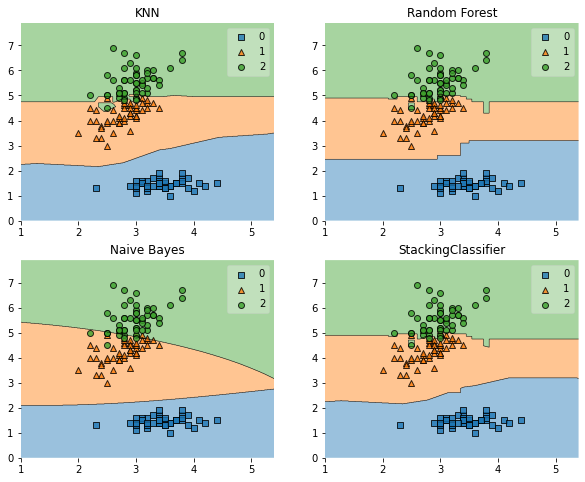

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf],
                         ['KNN',
                          'Random Forest',
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf,
                    param_grid=params,
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.933 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.927 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.933 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

## Regressor

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
np.random.seed(0)

X = np.asarray(eval(input()))
y = np.asarray(eval(input()))

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))

    # define meta learner model it'll be a linear regression model
    level1 = LinearRegression()

    # define the stacking ensemble for regression with level0 and meta model
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    #intialize the object for knn for regression
    models['knn'] = KNeighborsRegressor()
    #intialize the object for decision tree for regression
    models['cart'] = DecisionTreeRegressor()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3)

    # evaluate the model using mean_absolute error and the above cross validation strategy
    scores = cross_val_score(model, X, y, scoring='r2', cv = cv)

    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in sorted(models.items()):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    print('%s %.3f' % (name, np.mean(scores)))

# **SV - Support Vector![graph.webp](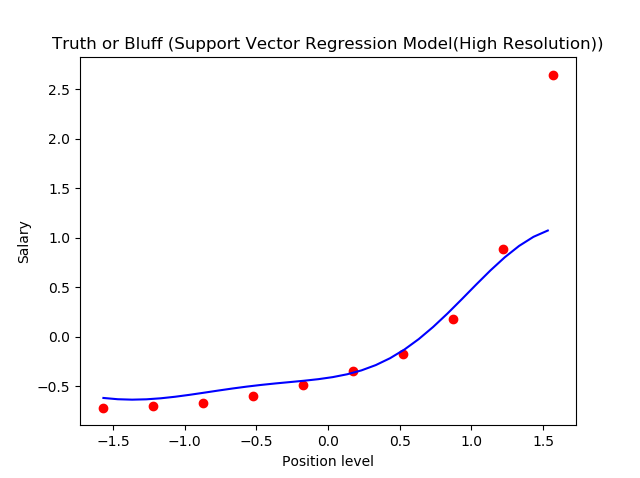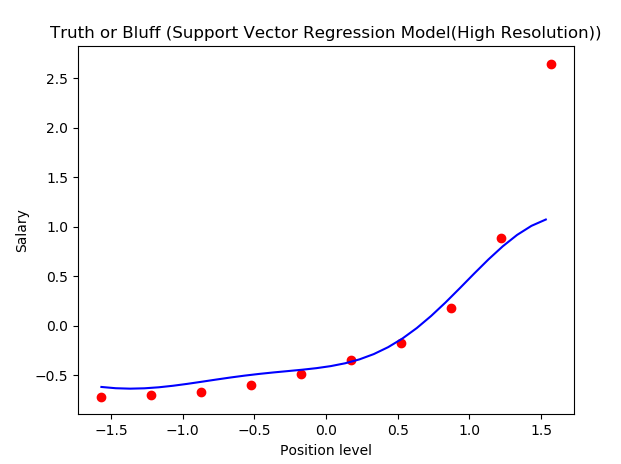)**

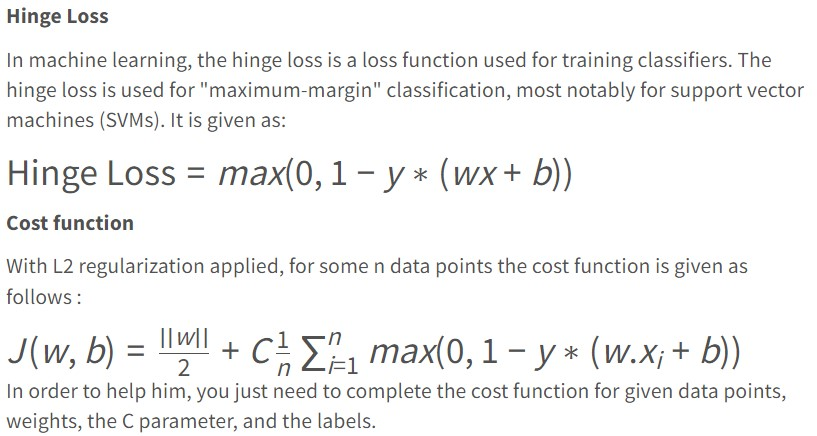

## SVM - Classficiation

In [ ]:
# Finding the Cost Value of SVM
# There are 4 inputs:
# weights: Learned weights of the support vector machines
# inps: Data points of logic gates
# labels: Logic gate results i.e. labels of the data points
# C: Penalty parameter that controls the margin of the support vectors

import numpy as np
def svm_cost(weights,inps, labels, C):
    cost = 0
    x  = np.array(inps)
    y  = np.array(labels)
    weights = np.array(weights)
    zero = np.zeros(y.shape[0])

    # YOUR CODE GOES HERE
    prediction = np.dot(x,weights)
    hinge_loss = np.maximum(0, 1 - y * prediction)
    data_loss = np.sum(hinge_loss)
    Max_Margin_term = 0.5 * np.linalg.norm(weights)
    cost = Max_Margin_term + (C * data_loss) / len(labels)
    # cost = (np.linalg.norm(weights)*0.5) + (C*sum(np.maximum(zero,1- y*np.dot(x,weights))/len(y)))
    return round(cost, 3)

In [ ]:
# Finding the Best Kernal Function

#import SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#X and y are the attributes and the response variable
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

#Write the code to find the best pair of C and kernel


# kernel_list represents your input list of kernels
# c_list represents your input list of values of C's

best_kernel = None
best_C = None

#YOUR CODE GOES HERE
max_acc = 0
for kernel in kernel_list:
    for C in c_list:
        model = SVC(kernel=kernel, C=C).fit(X_train, y_train)
        model_pred = model.predict(X_test)
        acc = accuracy_score(model_pred,y_test)
        if acc > max_acc:
            max_acc = acc
            best_kernel, best_C = kernel, C


#YOUR CODE ENDS HERE

print(best_kernel, best_C)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# Finding number of support vectors of model with the optimal set of hyper-parameters and best accuracy.

#import SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#X and y are the attributes and the response variable
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)


# kernel_list represents your input list of kernels
# c_list represents your input list of values of C's


#Write the code to find the best pair of C and kernel

best_support_vectors = None


#YOUR CODE GOES HERE

max_acc = 0
for kernel in kernel_list:
    for C in c_list:
        model = SVC(kernel=kernel, C=C).fit(X_train, y_train)
        model_pred = model.predict(X_test)
        acc = accuracy_score(model_pred,y_test)
        if acc > max_acc:
            max_acc = acc
            no_of_best_support_vectors = len(model.support_)
            best_support_vectors = model.support_vectors_



#YOUR CODE ENDS HERE

print(no_of_best_support_vectors)
print(best_support_vectors)

## SVR - Regression

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

* Our main aim here is to decide a decision boundary[Regression Line] at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.
* Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()